## Linear Regression model to estimate Boston properties price

Import necessary libraries
-  Pandas for data processing.
-  Numpy for mathematical operations.
-  Matplotlib for drawing figures
-  sklearn.cross_validation for splitting a data
-  Operator

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cross_validation

#### 1. Load the dataset from CSV file
#### 2. Divide the dataset into training and testing (use splitting ratio 80:20). 
    Splitting the dataset for training and a testing.
    80% training and 20% testing

In [179]:
path_to_file = "BostonHousing.csv" #File path
data = pd.read_csv(path_to_file, usecols = ['crim','indus','nox','rm','age','dis','rad','ptratio','medv']) #load dataset file

X = data.drop('medv', axis = 1) #Remove last column 
Y = data['medv'] #Add last column

X = np.c_[np.ones(X.shape[0]), X] #Add 1 in the first column on the features vector (X0), [X0,X1,....Xn]
#Splitting the data to training and testing 
X_train, X_test, Y_train, Y_test = sklearn.cross_validation.train_test_split(X,Y, train_size = 0.8,random_state=6 )


#### 3. Train a linear regression model using a gradient descent algorithm with a mean square error (MSE) cost-function.

In [180]:
#Gradient Descent algorithm

alpha = 0.001 #Step size or Step rate
iterations = 200000 #No. of iterations
m = X_train.size #No. of data in training dataset
theta = np.random.uniform(-0.5,0.5,(9)) #Generate random values for theta

#Gradient Descent function
#Input 
  #x, training features vector
  #y, training result(Price)
  #theta, random weights
  #iterations
  #alpha
#Output 
  #matrix of costs
  #matrix of thetas
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = [] #initiate costs matrix 
    past_thetas = [theta] #initiate thetas matrix 
    for i in range(iterations):
        #Cost function
        prediction = np.dot(x,theta)
        error = prediction - y
        cost =  np.mean(np.dot(error.T, error))
        past_costs.append(cost)
        
        #gradient descent
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))
        past_thetas.append(theta)

    return past_thetas, past_costs

#Pass the variables to the gradient_descent function
past_thetas, past_costs = gradient_descent(X_train, Y_train, theta, iterations, alpha)
theta = past_thetas[-1] #To find the last thetas

#Print the results
print("Gradient Descent: \n{:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}, {:.2f}".format(theta[0], theta[1],theta[2],theta[3],theta[4],theta[5],theta[6],theta[7],theta[8]))

Gradient Descent: 
0.89, -0.16, -0.23, -0.34, 7.28, -0.05, -0.91, -0.00, -0.74


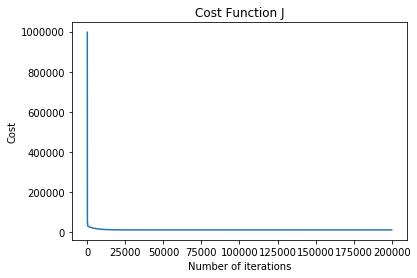

In [181]:
#Plot the cost function
plt.title('Cost Function J')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

#### 4. Test the performance of the model. 
#### 5. Compute and report the mean square error on the testing set. 

In [182]:
Pre_y = np.dot(X_test,theta) #Compute predicted y
error_test = np.mean(np.square(Pre_y - Y_test)) #Compute the mean square error on the testing set.
print("The mean square error on testing is: {:.2f}".format(error_test))

The mean square error on testing is: 29.36


#### 6. Find and report the most significant features in the regression model.

In [183]:
import operator
index, value = max(enumerate(theta), key=operator.itemgetter(1))
# Most significant feature
Most_Feature = data.columns[index-1]
print("The most significant feature is: ", Most_Feature,", with theta: {:.2f}".format(value))

The most significant feature is:  rm , with theta: 7.28


Text(0.5,0,'rm')

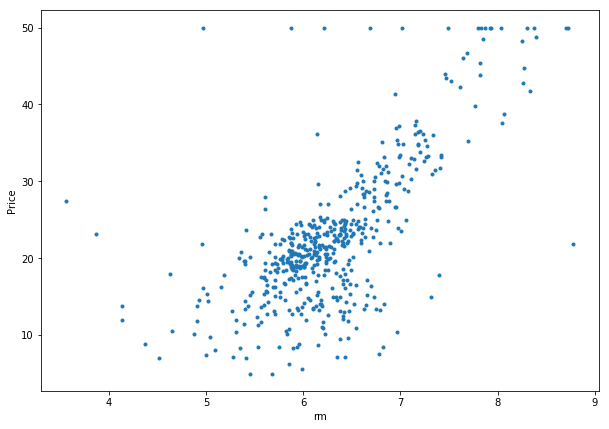

In [184]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(data[Most_Feature],data['medv'],'.')
ax.set_ylabel('Price')
ax.set_xlabel(Most_Feature)